In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

[166042]


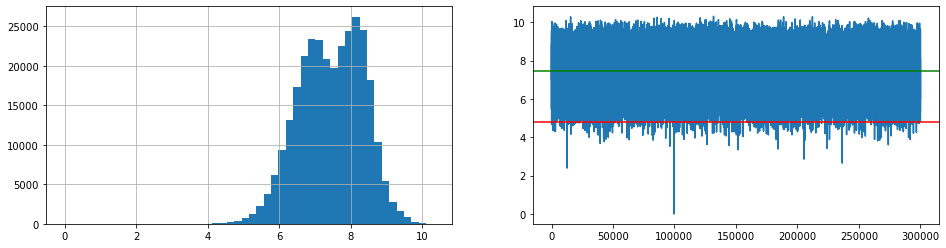

In [3]:
dataset = pd.read_csv('../input/tabular-playground-series-feb-2021/train.csv')

# Check null data --> There is no null data.
#print(dataset.isnull().sum())

# category variable
category = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']

# continuous variable
continuous = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 
              'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

# One-Hot Encoding is better but for feature importance search,
# use LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in category:
    dataset[x] = encoder.fit_transform(dataset[x])

#dataset['target'].plot()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
dataset['target'].hist(bins=50, ax=axes[0])
dataset['target'].plot(ax=axes[1])
target_mean = dataset.describe().loc['mean', 'target']
target_std = dataset.describe().loc['std', 'target']
axes[1].axhline(y=target_mean, color='g')
axes[1].axhline(y=target_mean-3*target_std, color='r')

# histogram shows bimodal

outlier = dataset.loc[dataset['target'] < 2, 'id'].values
print(outlier)

#for x in outlier:
#    dataset = dataset[dataset['id'] != x]


In [ ]:
def draw_hist(dataset):
    first_class = dataset.loc[dataset['class'] == 1, 'target']
    second_class = dataset.loc[dataset['class'] == 0, 'target']
    first_class.to_csv('temp.csv')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
    first_class.hist(ax=axes[0,0])
    second_class.hist(ax=axes[0,1])
    first_class.plot(ax=axes[1,0])
    second_class.plot(ax=axes[1,1])
    axes[1,0].axhline(y=first_class.max(), color='r')
    axes[1,1].axhline(y=second_class.min(), color='r')
    print(first_class.max())
    print(second_class.min())

    
# Gaussian Mixture
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0)
target_val_2d = dataset['target'].values.reshape(-1,1)
place_holder = dataset
gm.fit(target_val_2d)
place_holder['class'] = gm.predict(target_val_2d)
draw_hist(place_holder)

''' きれいに分類できなかったので封印...
gm = GaussianMixture(n_components=2, random_state=0)
place_holder = pd.get_dummies(dataset, columns=category, drop_first=True)
gm.fit(place_holder)
place_holder['class'] = gm.predict(place_holder)
draw_hist(place_holder)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
place_holder = pd.get_dummies(dataset, columns=category, drop_first=True)
kmeans.fit(place_holder)
place_holder['class'] = kmeans.predict(place_holder)
draw_hist(place_holder)
'''

''' メモリが死ぬので封印...
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
place_holder = pd.get_dummies(dataset, columns=category, drop_first=True)
hc.fit(place_holder)
place_holder['class'] = hc.predict(place_holder)
draw_hist(place_holder)
'''

In [11]:
X = dataset.drop(columns=['id', 'target'])
y = dataset['target']

import xgboost as xgb
import shap

model = xgb.XGBRegressor(learning_rate=0.0001)
model.fit(X,y)

model_output = "margin" has been renamed to model_output = "raw"


Exception: The feature_dependence option has been renamed to feature_perturbation! Please update the option name before calling TreeExplainer. See GitHub issue #882.

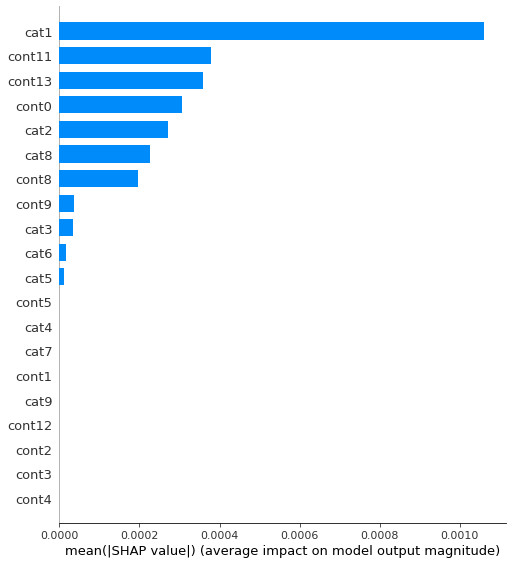

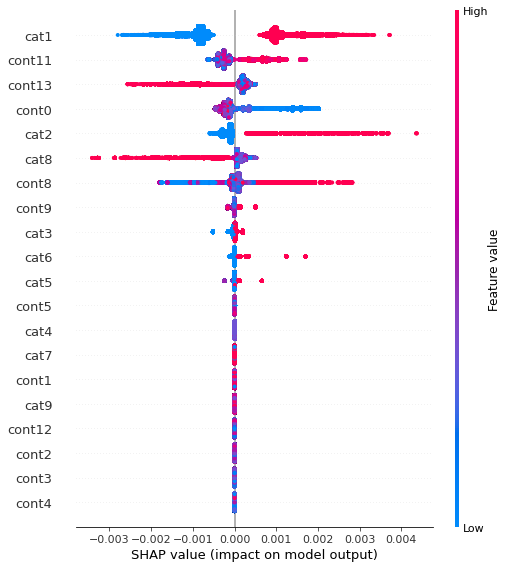

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model=model, feature_perturbation='tree_path_dependent', model_output='raw')
shap_values = explainer.shap_values(X=X)
shap.summary_plot(shap_values, X, plot_type='bar')
shap.summary_plot(shap_values, X)
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=X)


In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
place_holder = dataset
for x in category:
    place_holder[x] = encoder.fit_transform(dataset[x].values)
correlation = dataset.corr()
sns.heatmap(correlation)

In [ ]:
dataset = dataset[dataset['id'] != 166042]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22,8))
for i, x in enumerate(category):
    # 一列ごとに
    row = int(i/5)
    col = int(i%5)
    dataset[x].hist(ax=axes[row,col])

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(22,10))
skew_list = []
for i, x in enumerate(continuous):
    # 一列ごとに
    row = int(i/7)
    col = int(i%7)
    sns.distplot(dataset[x], ax=axes[row,col])
    #dataset[x].hist(ax=axes[row,col])
    axes[row,col].set_title(x)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,8))
for i, x in enumerate(continuous):
    # 一列ごとに
    row = int(i/7)
    col = int(i%7)
    dataset.plot.scatter(x=x, y='target',ax=axes[row,col])
    axes[row,col].axhline(y=7.453254726997347, color='r')
    axes[row,col].set_title(x)